<a href="https://colab.research.google.com/github/mani6496/Amazon-Customer-Review/blob/main/AirLine_Passenger_RNN_Model_by_Mani_Bhushan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout

In [132]:
data = pd.read_csv('/content/airline-passengers - airline-passengers.csv')
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [133]:
data = data['Passengers'].values.reshape(-1, 1)
data

array([[112],
       [118],
       [132],
       [129],
       [121],
       [135],
       [148],
       [148],
       [136],
       [119],
       [104],
       [118],
       [115],
       [126],
       [141],
       [135],
       [125],
       [149],
       [170],
       [170],
       [158],
       [133],
       [114],
       [140],
       [145],
       [150],
       [178],
       [163],
       [172],
       [178],
       [199],
       [199],
       [184],
       [162],
       [146],
       [166],
       [171],
       [180],
       [193],
       [181],
       [183],
       [218],
       [230],
       [242],
       [209],
       [191],
       [172],
       [194],
       [196],
       [196],
       [236],
       [235],
       [229],
       [243],
       [264],
       [272],
       [237],
       [211],
       [180],
       [201],
       [204],
       [188],
       [235],
       [227],
       [234],
       [264],
       [302],
       [293],
       [259],
       [229],
       [203],
      

In [134]:
#np.reshape?

In [135]:
# Normalize the data
scaler=MinMaxScaler(feature_range=(0,1))
data=scaler.fit_transform(data)

In [136]:
# Split the data into training and testing sets
train_data=data[:int(len(data)*0.7)]
test_data=data[int(len(data)*0.7):]

In [137]:
# Prepare the data for the RNN
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size - 1):
        X.append(data[i:(i + window_size), 0])
        y.append(data[i + window_size, 0])
    return np.array(X), np.array(y)

window_size = 30

In [138]:
X_train,y_test=create_dataset(train_data,window_size)
X_test, y_test=create_dataset(test_data,window_size)



In [139]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [140]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(69, 30, 1)
(69,)
(13, 30, 1)
(13,)


In [141]:
# initialize the model

model = Sequential()
 
#add the 1st SimpleRNN layer with the Dropout layer having rate=0.2, units=50
model.add(SimpleRNN(units = 50,return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(rate = 0.2))

##add 2nd SimpleRNN layer with the Dropout layer having rate=0.2 , units=60
model.add(SimpleRNN(units = 50))
model.add(Dropout(rate = 0.2))

#output layer. The output dimension is 1 since we are predicting 1 price each time.
model.add(Dense(units = 1))

In [142]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [143]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
3/3 [==============================] - 2s 19ms/step - loss: 0.2884
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.1222
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0738
Epoch 4/100
3/3 [==============================] - 0s 19ms/step - loss: 0.0795
Epoch 5/100
3/3 [==============================] - 0s 24ms/step - loss: 0.0681
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0680
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0688
Epoch 8/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0651
Epoch 9/100
3/3 [==============================] - 0s 26ms/step - loss: 0.0716
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0531
Epoch 11/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0390
Epoch 12/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0360
Epoch 13/100
3/3 [==============================]

In [144]:
model.compile(optimizer='sgd', loss='mean_squared_error')

In [145]:
model.fit(X_train, y_train, epochs=50, batch_size = 32)

Epoch 1/50
3/3 [==============================] - 2s 17ms/step - loss: 0.0052
Epoch 2/50
3/3 [==============================] - 0s 26ms/step - loss: 0.0052
Epoch 3/50
3/3 [==============================] - 0s 31ms/step - loss: 0.0029
Epoch 4/50
3/3 [==============================] - 0s 20ms/step - loss: 0.0051
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 0.0044
Epoch 6/50
3/3 [==============================] - 0s 22ms/step - loss: 0.0058
Epoch 7/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0059
Epoch 8/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0057
Epoch 9/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0048
Epoch 10/50
3/3 [==============================] - 0s 15ms/step - loss: 0.0046
Epoch 11/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0051
Epoch 12/50
3/3 [==============================] - 0s 16ms/step - loss: 0.0066
Epoch 13/50
3/3 [==============================] - 0s 19ms/st

In [146]:
predictions = model.predict(X_test)

1/1 [==============================] - 0s 254ms/step


In [147]:
predictions = scaler.inverse_transform(predictions)

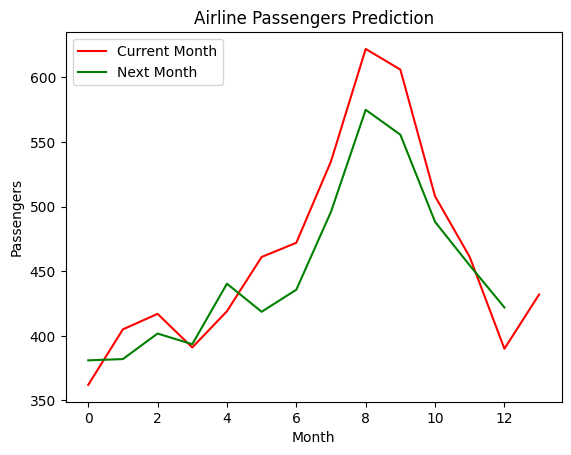

In [148]:
plt.plot(scaler.inverse_transform(test_data[window_size:]), color='red', label='Current Month')
plt.plot(predictions, color='green', label='Next Month')
plt.title('Airline Passengers Prediction')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()